In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import torch
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from Scripts.DataManager.GraphConstructor.CoOccurrenceGraphConstructor import CoOccurrenceGraphConstructor

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
from Scripts.Configs.ConfigClass import Config
config = Config(r'C:\Users\fardin\Projects\ColorIntelligence\Scripts\Configs\Config.json')
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx

In [2]:
train_df = pd.read_csv(r'C:\Users\fardin\Projects\ColorIntelligence\data\Amazon-Review\train_sm.csv')
test_df = pd.read_csv(r'C:\Users\fardin\Projects\ColorIntelligence\data\Amazon-Review\test_sm.csv')

In [3]:
train_df.columns = ['Polarity', 'Title', 'Review']
test_df.columns = ['Polarity', 'Title', 'Review']

In [4]:
train_df = train_df[['Polarity', 'Review']]
test_df = test_df[['Polarity', 'Review']]

In [5]:
graph_const = CoOccurrenceGraphConstructor(train_df['Review'][0], config)

n_gram_ids: read    51
be       1
a       39
I       32
dtype: int64
n_gram_ids: read    51
be       1
lot     30
a       39
dtype: int64
n_gram_ids: of      34
a       39
read    51
lot     30
dtype: int64
n_gram_ids: a         39
of        34
lot       30
review    61
dtype: int64
n_gram_ids: of        34
lot       30
say       55
review    61
dtype: int64
n_gram_ids: of        34
say       55
that      48
review    61
dtype: int64
n_gram_ids: review    61
that      48
say       55
this       5
dtype: int64
n_gram_ids: say     55
be       1
that    48
this     5
dtype: int64
n_gram_ids: this     5
be       1
that    48
the      9
dtype: int64
n_gram_ids: this     5
be       1
good    27
the      9
dtype: int64
n_gram_ids: be       1
'       35
good    27
the      9
dtype: int64
n_gram_ids: game    46
the      9
'       35
good    27
dtype: int64
n_gram_ids: soundtrack    57
game          46
'             35
good          27
dtype: int64
n_gram_ids: game          46
soundtrack    57
'

In [8]:
print(graph_const.graph)

Data(x=[65, 300], edge_index=[2, 532], edge_attr=[532])


{0: Text(-0.008864183577764952, 0.6955056325801113, 'refuse'),
 1: Text(-0.004496829645925331, -0.17876144178419656, 'be'),
 2: Text(-0.2701825358251468, 0.5107109958957388, 'much'),
 3: Text(0.48552528384460847, -0.11298802286525597, 'timeless'),
 4: Text(0.21314014599464853, 0.35578180939296805, 'listen'),
 5: Text(-0.13574327110627732, -0.006081653804062398, 'this'),
 6: Text(0.2410018191739227, -0.3643542290277883, 'only'),
 7: Text(0.5053049428294684, -0.33062172000180673, 'feel'),
 8: Text(-0.02320158404286078, -0.5168625602013815, 'my'),
 9: Text(0.06768141768236947, -0.18771026791333556, 'the'),
 10: Text(0.6834130447866067, -0.48008108145503864, 'every'),
 11: Text(0.03231711136758117, 0.5997955647272412, 'for'),
 12: Text(-0.06661628833458103, 0.3085055724578015, 'money'),
 13: Text(-0.3591330894025018, -0.0374838366129345, ','),
 14: Text(0.38045175008213233, 1.0, 'its'),
 15: Text(-0.5017051168133246, -0.4360700780281676, 'must'),
 16: Text(0.5793013138370124, -0.7433054182

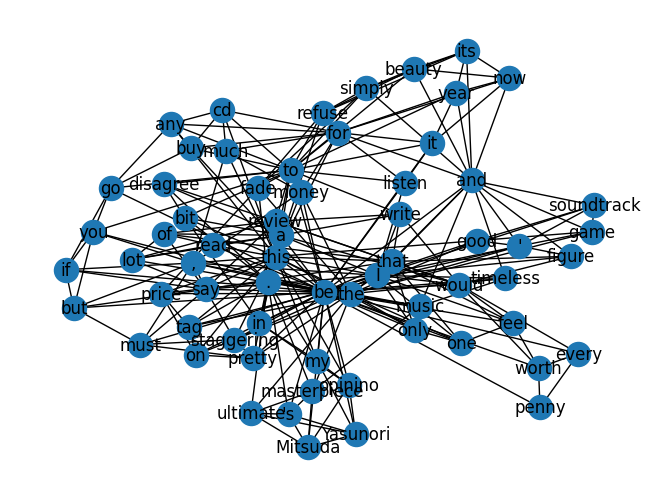

In [9]:
g = to_networkx(graph_const.graph, to_undirected=True)
layout = nx.spring_layout(g)
nx.draw(g, pos=layout)
unique_words_dict = {i: graph_const.unique_words[i] for i in range(len(graph_const.unique_words))}
nx.draw_networkx_labels(g, pos=layout, labels=unique_words_dict)

In [6]:
doc_graph.edge_index

NameError: name 'doc_graph' is not defined

In [13]:
len(graph_const.unique_words)

104

In [8]:
[(x,y) for x in range(3) for y in range(3) if x!=y]

[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]